In [4]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pickle

In [5]:
#this function performs 5-fold cross validation and returns an average accuracy. It takes a model as a parameter.
def crossValidation5 (model):
  k = 5
  kf = KFold(n_splits=k)
  result = cross_val_score(model, X_train, y_train.ravel(), cv=kf, scoring="accuracy")
  return result.mean()

In [6]:
#creating a dataframe from the CSV file
diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [7]:
#taking a look at the dataframe
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


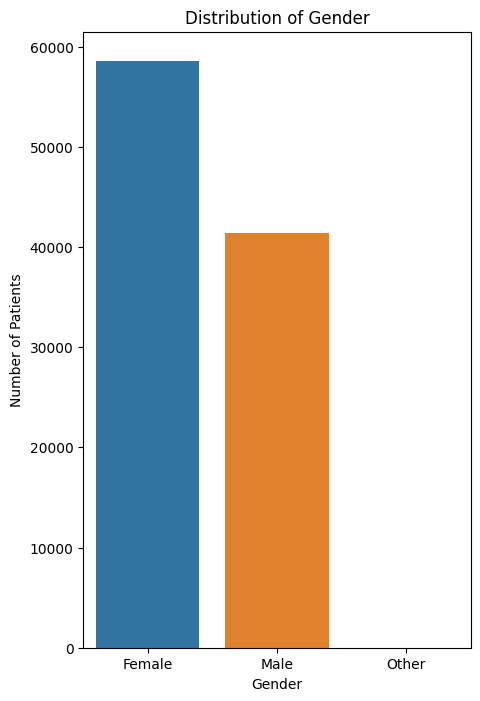

In [8]:
#visualizing gender distribution
gender_count = diabetes.gender.value_counts()
plt.figure (figsize=(5,8))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title("Distribution of Gender")
plt.ylabel("Number of Patients")
plt.xlabel("Gender")
plt.show()

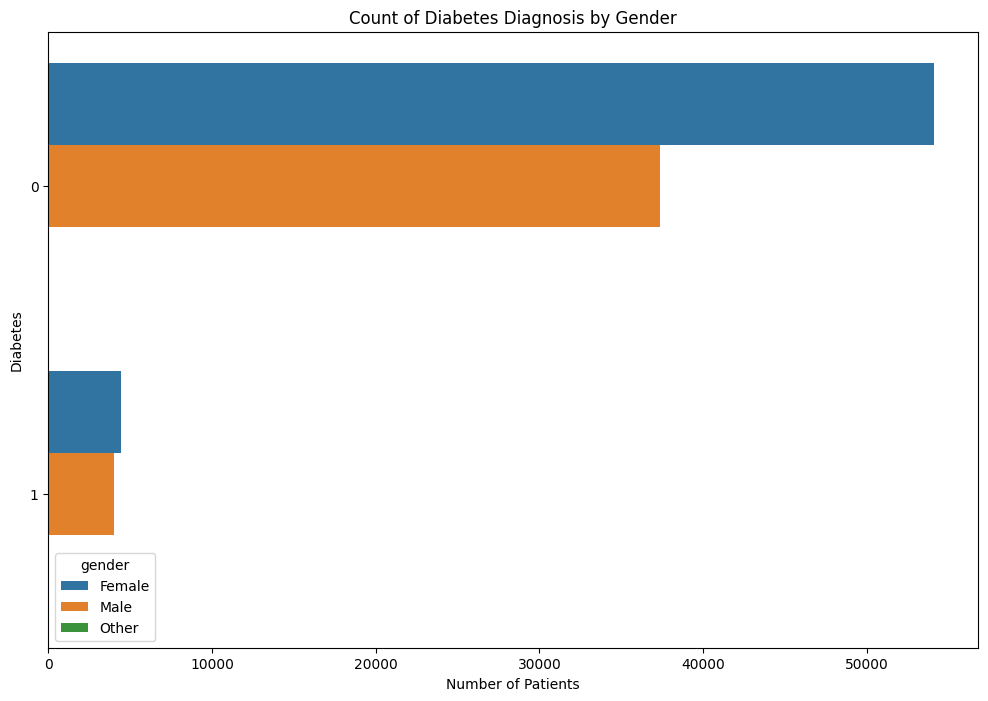

In [9]:
#visualizing count of patients based on diabetes diagnosis grouped by gender [1]
plt.figure(figsize=(12,8))
plt.title("Count of Diabetes Diagnosis by Gender")
sns.countplot(y=diabetes.diabetes, hue=diabetes.gender, orientation="horizontal")
plt.ylabel("Diabetes")
plt.xlabel("Number of Patients")
plt.show()

<Axes: title={'center': 'Pie Chart of Smoking History Distribution'}, ylabel='smoking_history'>

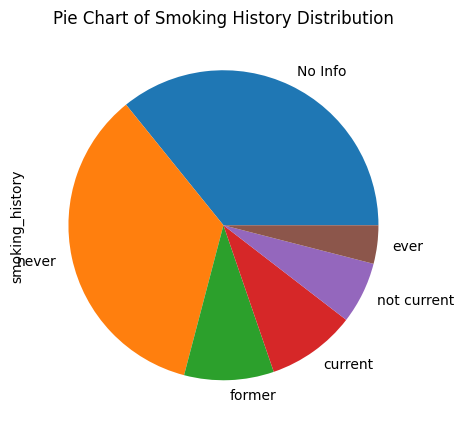

In [10]:
#Visualizing the distribution of smoking history
smoking_history_data = diabetes.smoking_history.value_counts()
plt.figure(figsize = (5,8))
smoking_history_data.plot.pie(title='Pie Chart of Smoking History Distribution')

In [11]:
#ordinally encoding gender
#setting up a map
gender_map = {'Female':1,"Male":2, "Other":3}
#encoding the values
diabetes.gender = diabetes.gender.replace(gender_map)

In [12]:
#ordinally encoding smoking history
#setting up a map
smoking_map = {"No Info":0,"never":1, "ever":2, "not current":3, "former":4, "current":5}
#encoding the values
diabetes.smoking_history = diabetes.smoking_history.replace(smoking_map)

In [13]:
#getting the features (X) and targets (y) of the dataset
#creating a list to get column names
columns_list = list(diabetes.columns.values)
X = diabetes[columns_list[:-1]]
y = diabetes[columns_list[-1]]

In [14]:
#splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [15]:
#feature scaling
#standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN

## Optimal K Value

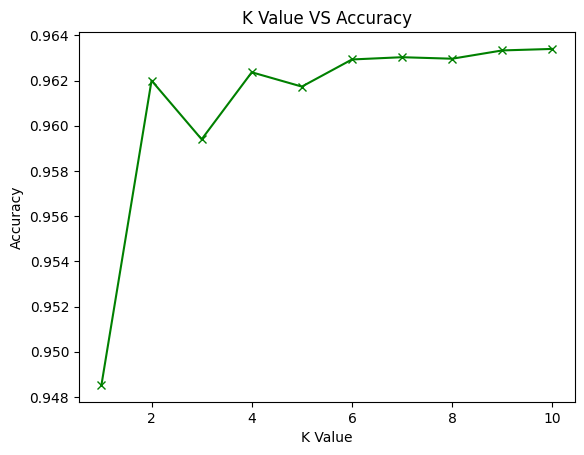

In [16]:
#determining what K value to use
accuracy = []

#this loop goes through several K values, from 1 to 10. It uses the K value for a KNN model and finds its accuracy. The accuracy is then appended to the
#list.
for i in range (1, 11):
  #creating and training a model for the K value
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  #using the model to make a prediction
  y_pred = knn.predict(X_test)
  #finding the accuracy score for the model and appending it to the list
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
#plotting the accuracies for different K values
plt.plot(list(range(1,11)), accuracy, color='green', marker='x')
plt.title('K Value VS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.show()

## Training the KNN model

In [17]:
#training a KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=4)

## KNN 5-fold cross validation

In [18]:
#5-fold cross validation for the KNN model
knn_accuracy = crossValidation5(knn)
print(f'Average Accuracy: {knn_accuracy}')

Average Accuracy: 0.9604857142857144


## KNN Classification Report

In [19]:
#Predicting the test set results
y_pred = knn.predict(X_test)

In [20]:
#generating a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27508
           1       0.93      0.59      0.72      2492

    accuracy                           0.96     30000
   macro avg       0.95      0.79      0.85     30000
weighted avg       0.96      0.96      0.96     30000



# SVM

## Training SVM models

In [21]:
#training several SVM models to find the optimal one
linear = svm.SVC(kernel='linear', C=.95, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=0.85, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=.90, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

## SVM 5-fold Cross Validation

In [22]:
#performing 5-fold cross validation for the Linear SVM
linear_SVM_accuracy = crossValidation5(linear)
print(f'Average Accuracy: {linear_SVM_accuracy}')

Average Accuracy: 0.9602


In [23]:
#performing 5-fold cross validation for the RBF SVM
rbf_SVM_accuracy = crossValidation5(rbf)
print(f'Average Accuracy: {rbf_SVM_accuracy}')

Average Accuracy: 0.9650428571428572


In [24]:
#performing 5-fold cross validation for the poly SVM
poly_SVM_accuracy = crossValidation5(poly)
print(f'Average Accuracy: {poly_SVM_accuracy}')

Average Accuracy: 0.9634857142857143


In [25]:
#performing 5-fold cross validation for the sig SVM
sig_SVM_accuracy = crossValidation5(sig)
print(f'Average Accuracy: {sig_SVM_accuracy}')

Average Accuracy: 0.9149428571428571


## SVM Classification Report

In [26]:
#Linear SVM Classification Report
svm_linear_pred = linear.predict(X_test)
print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27508
           1       0.92      0.60      0.72      2492

    accuracy                           0.96     30000
   macro avg       0.94      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [27]:
#rbf SVM Classification report
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27508
           1       0.96      0.63      0.76      2492

    accuracy                           0.97     30000
   macro avg       0.96      0.81      0.87     30000
weighted avg       0.97      0.97      0.96     30000



In [28]:
#poly SVM Classification report
svm_poly_pred = poly.predict(X_test)
print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27508
           1       0.98      0.59      0.74      2492

    accuracy                           0.97     30000
   macro avg       0.97      0.80      0.86     30000
weighted avg       0.97      0.97      0.96     30000



In [29]:
#sig SVM Classification report
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     27508
           1       0.48      0.50      0.49      2492

    accuracy                           0.91     30000
   macro avg       0.72      0.73      0.72     30000
weighted avg       0.92      0.91      0.91     30000



#Naive Bayes

##Naive Bayes Training

In [30]:
#training the Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

##Naive Bayes 5-fold Cross Validation

In [31]:
#performing 5-fold cross validation for GNB
gnb_accuracy = crossValidation5(gnb)
print(f'Average Accuracy: {gnb_accuracy}')

Average Accuracy: 0.9032


##Naive Bayes Classification Report

In [32]:
#generating a classification report for the GNB model
gnb_pred = gnb.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27508
           1       0.44      0.65      0.53      2492

    accuracy                           0.90     30000
   macro avg       0.70      0.79      0.74     30000
weighted avg       0.92      0.90      0.91     30000



# Decision Tree

##Decision Tree Training

In [33]:
#training the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Decision Tree 5-fold Cross Validation

In [34]:
#performing 5-fold cross validation for the decision tree model
dt_accuracy = crossValidation5(dt)
print(f'Average Accuracy:{dt_accuracy}')

Average Accuracy:0.9513


## Decision Tree Classification Report

In [35]:
#generating a classification report
dt_pred = dt.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27508
           1       0.70      0.76      0.73      2492

    accuracy                           0.95     30000
   macro avg       0.84      0.86      0.85     30000
weighted avg       0.95      0.95      0.95     30000



# Random Forest

## Random Forest Training

In [36]:
#training the random forest model
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=5)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=5)

##Random Forest 5-Fold Cross Validation

In [37]:
#performing 5-fold cross validation for the random forest model
rf_accuracy = crossValidation5(rf)
print(f'Average Accuracy: {rf_accuracy}')

Average Accuracy: 0.9686428571428571


## Random Forest Classification Report

In [38]:
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27508
           1       0.92      0.70      0.79      2492

    accuracy                           0.97     30000
   macro avg       0.95      0.85      0.89     30000
weighted avg       0.97      0.97      0.97     30000



#Comparing the Models

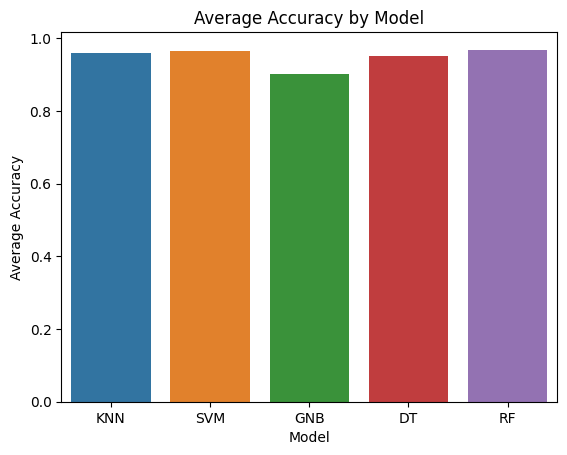

In [39]:
#plotting average accuracy for each of the models from the 5-fold cross validation
data = {'KNN':knn_accuracy,
        'SVM':rbf_SVM_accuracy,
        'GNB':gnb_accuracy,
        'DT':dt_accuracy,
        'RF':rf_accuracy
        }
plt.title('Average Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
sns.barplot(x = list(data.keys()), y = list(data.values()))
plt.show()

In [40]:
#setting up lists with the models' data
X = ['KNN','SVM', 'GNB','DT', 'RF']
accuracy = [0.96,0.97,0.90,0.95,0.97]
precision = [0.96, 0.97,0.92,0.95,0.97]
recall = [0.96,0.97,0.90,0.95,0.97]
f1 = [0.96,0.96,0.91,0.95,0.97]

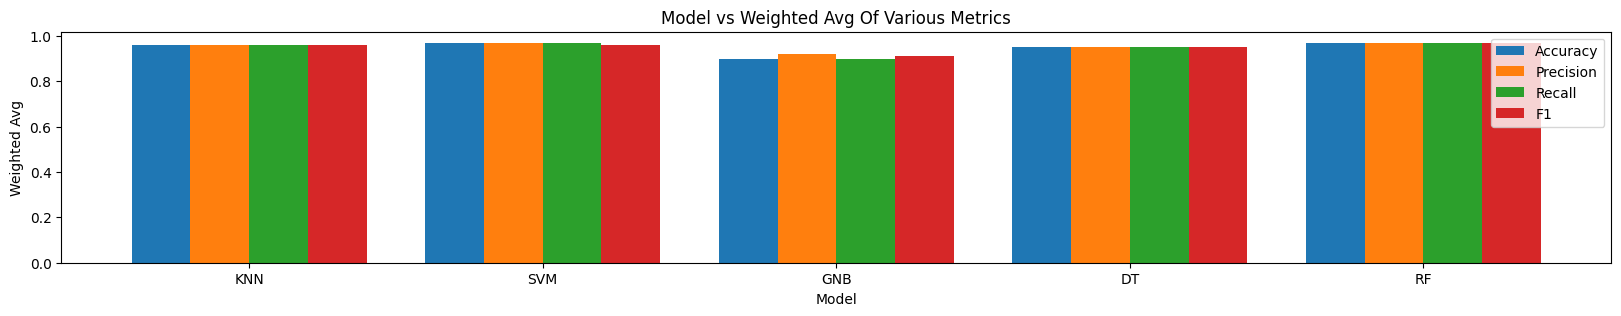

In [41]:
#Visualizing the models' metrics

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()

# Exporting the model

In [42]:
#exporting the model

with open('diabetes_model.pkl', 'wb') as f:
  pickle.dump(rf, f)

#exporting the scalar

with open('diabetes_scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)

# Resources:

1. https://seaborn.pydata.org/generated/seaborn.countplot.html